In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import heapq
from collections import defaultdict


# decompress the audio file

In [2]:
# 桌面文件夹路径
desktop_path = os.path.expanduser("~/Desktop")

# EE4740_Miniproject_1 2文件夹路径
folder_path = os.path.join(desktop_path, "EE4740_Miniproject_1")

# 遍历每个文件夹
for folder_name in os.listdir(folder_path):
    folder_dir = os.path.join(folder_path, folder_name)
    
    # 确保文件夹是目标文件夹且存在
    if os.path.isdir(folder_dir):
        print("Processing folder:", folder_name)
        
        # 遍历文件夹中的文件
        for file_name in os.listdir(folder_dir):
            if file_name.endswith(".wav.zip"):
                zip_file_path = os.path.join(folder_dir, file_name)
                print("Extracting from:", file_name)
                
                # 创建一个文件夹来保存解压后的.wav文件
                output_folder = os.path.splitext(zip_file_path)[0]  # 去除.zip扩展名
                os.makedirs(output_folder, exist_ok=True)
                
                # 打开压缩包文件
                with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
                    # 解压缩所有文件到输出文件夹
                    zip_ref.extractall(output_folder)
                
                # 获取解压后的文件列表
                extracted_files = os.listdir(output_folder)
                
                # 遍历解压后的文件，提取.wav文件
                for extracted_file in extracted_files:
                    if extracted_file.endswith(".wav"):
                        wav_file_path = os.path.join(output_folder, extracted_file)
                        print("Found .wav file:", extracted_file)
                        
                        # 这里可以对.wav文件进行处理，例如将其复制到另一个文件夹中等
                        # 在这个示例中，我们只打印了找到的.wav文件的路径
                        print("Wav File Path:", wav_file_path)
                
        print("Extraction completed.\n")


Processing folder: M1
Extracting from: SA2.wav.zip
Extracting from: SI2293.wav.zip
Extraction completed.

Processing folder: F4
Extracting from: SX224.wav.zip
Extracting from: SI2204.wav.zip
Extraction completed.

Processing folder: F3
Extracting from: SI2114.wav.zip
Extracting from: SX134.wav.zip
Extraction completed.

Processing folder: F2
Extracting from: SX304.wav.zip
Extracting from: SX34.wav.zip
Extraction completed.

Processing folder: M2
Extracting from: SX374.wav.zip
Extracting from: SI602.wav.zip
Extraction completed.

Processing folder: M3
Extracting from: SX289.wav.zip
Extracting from: SX199.wav.zip
Extraction completed.

Processing folder: M4
Extracting from: SX389.wav.zip
Extracting from: SI1019.wav.zip
Extraction completed.

Processing folder: F1
Extracting from: SA1.wav.zip
Extracting from: SI1573.wav.zip
Extraction completed.



# plot the time series of the extracted.wav files (16 in total)

Processing folder: M1
Plotting waveform for: SA2.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 18535
Plotting waveform for: SI2293.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 28928
Processing folder: F4
Plotting waveform for: SI2204.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 30874
Plotting waveform for: SX224.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 12903
Processing folder: F3
Plotting waveform for: SI2114.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 20480
Plotting waveform for: SX134.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 22477
Processing folder: F2
Plotting waveform for: SX304.wav
Channels: 1
Sample Width (bytes): 2
Frame Rate (samples per second): 8000
Total Frames: 22375
Plotting waveform for:

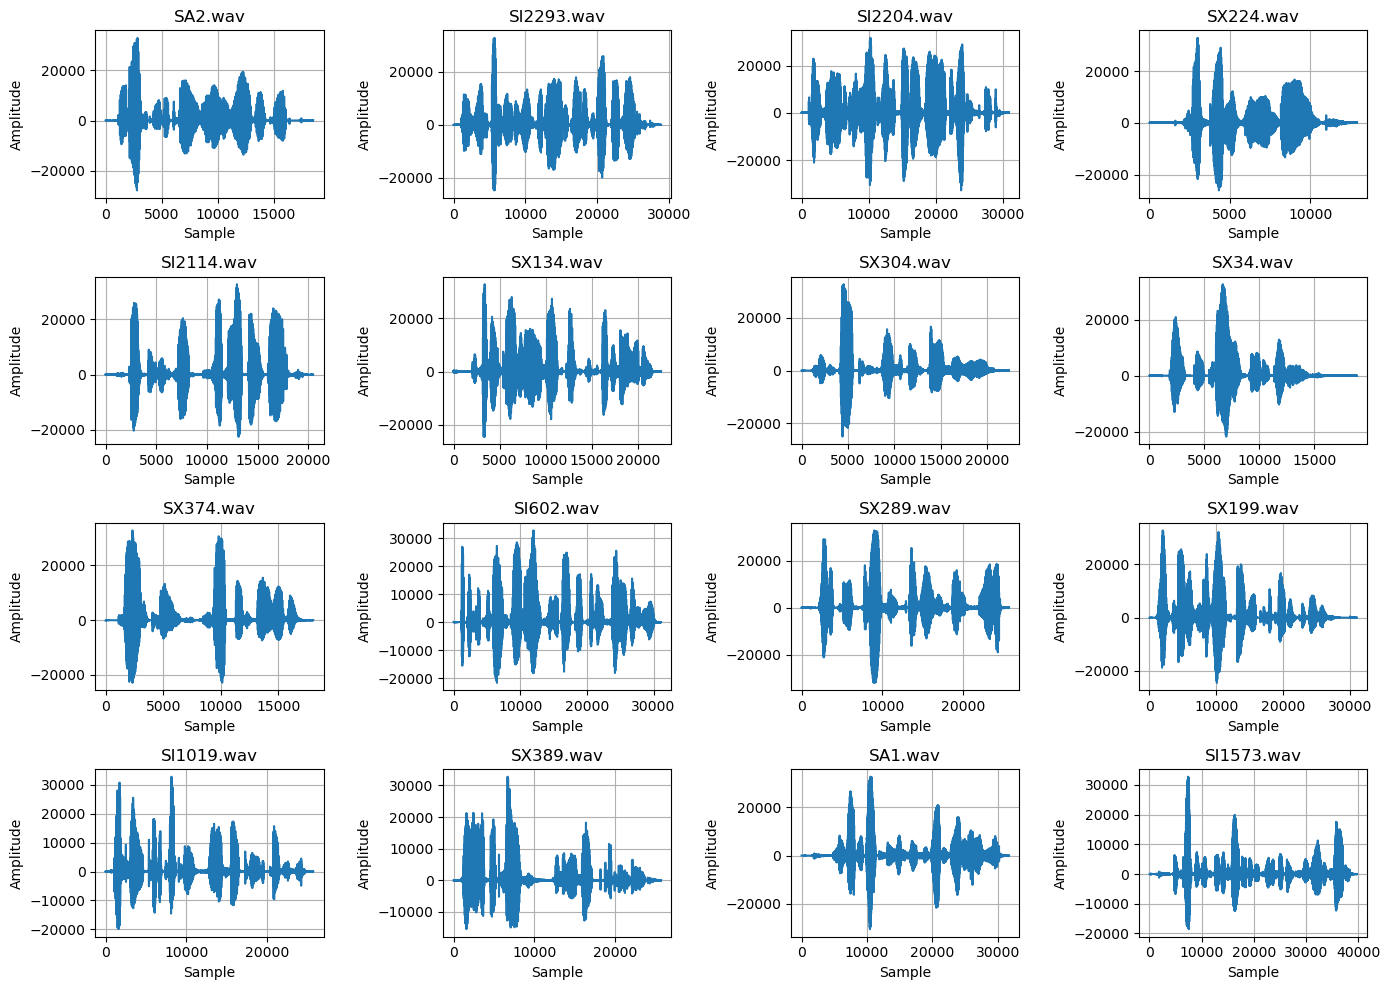

In [3]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

# Audio Data文件夹路径
folder_path = "/Users/kevingao/Desktop/Audio Data"

# 创建一个图形，包含16个子图
fig, axs = plt.subplots(4, 4, figsize=(14, 10))

# 计数器，用于在子图中定位
count = 0

# 遍历每个文件夹
for folder_name in os.listdir(folder_path):
    folder_dir = os.path.join(folder_path, folder_name)
    
    # 确保文件夹是目标文件夹且存在
    if os.path.isdir(folder_dir):
        print("Processing folder:", folder_name)
        
        # 遍历文件夹中的文件
        for file_name in os.listdir(folder_dir):
            if file_name.endswith(".wav"):
                wav_file_path = os.path.join(folder_dir, file_name)
                
                # 打开.wav文件
                wav_file = wave.open(wav_file_path, 'rb')
                
                # 获取.wav文件的参数
                channels = wav_file.getnchannels()  # 声道数
                sample_width = wav_file.getsampwidth()  # 采样位宽（字节数）
                frame_rate = wav_file.getframerate()  # 采样率
                frames = wav_file.getnframes()  # 总帧数
                
                print("Plotting waveform for:", file_name)
                print("Channels:", channels)
                print("Sample Width (bytes):", sample_width)
                print("Frame Rate (samples per second):", frame_rate)
                print("Total Frames:", frames)
                
                # 读取.wav文件中的数据
                wav_data = wav_file.readframes(frames)
                wav_file.close()
                
                # 将二进制数据转换为numpy数组
                if sample_width == 1:
                    dtype = np.uint8  # 8-bit unsigned integer
                elif sample_width == 2:
                    dtype = np.int16  # 16-bit signed integer
                else:
                    raise ValueError("Unsupported sample width")
                
                wav_samples = np.frombuffer(wav_data, dtype=dtype)
                
                # 每个声道的数据
                if channels == 2:
                    left_channel = wav_samples[::2]
                    right_channel = wav_samples[1::2]
                else:
                    left_channel = wav_samples
                

                # 绘制波形图
                ax = axs[count // 4, count % 4]
                ax.plot(left_channel)
                ax.set_title(file_name)
                ax.set_xlabel("Sample")
                ax.set_ylabel("Amplitude")
                ax.grid(True)
                
                # 更新计数器
                count += 1
                
                # 最多绘制16个文件的波形图
                if count >= 16:
                    break
                
# 调整子图布局
plt.tight_layout()
plt.show()


# preprocessing the training data (M3 + F3)

Processing folder: M3
Processing folder: F3


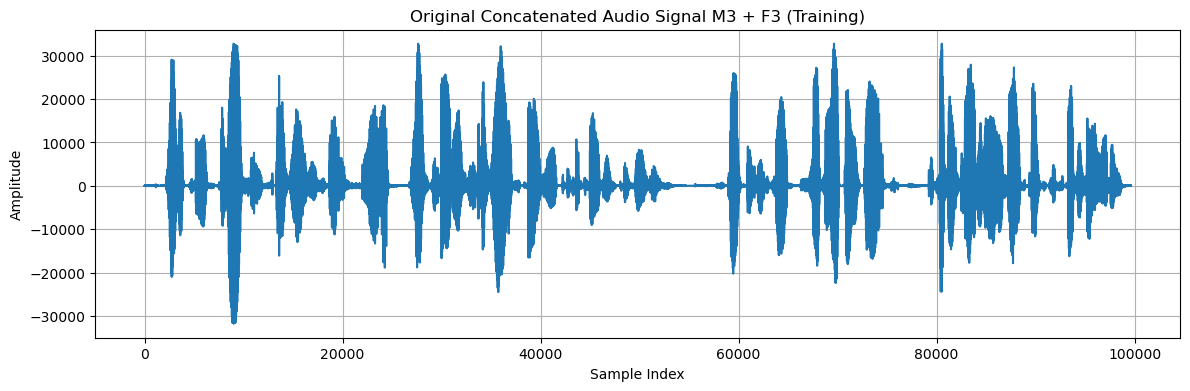

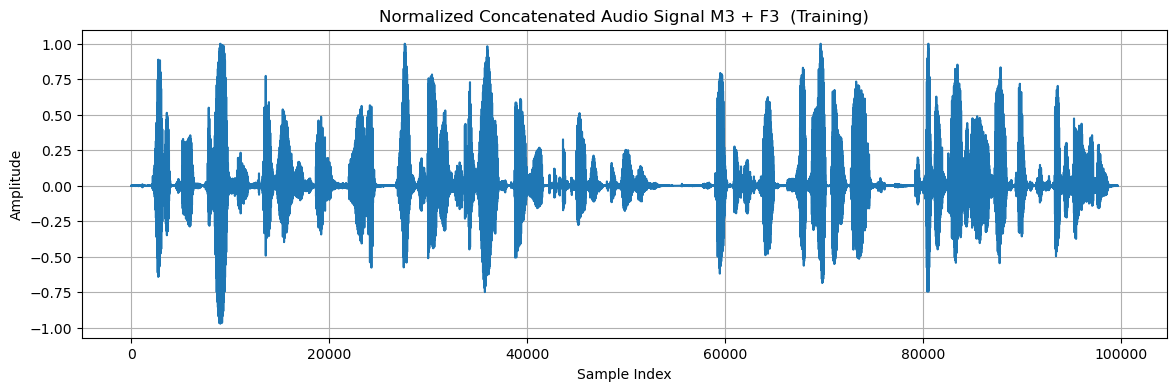

In [4]:
# Audio Data文件夹路径
folder_path = "/Users/kevingao/Desktop/Audio Data"

# 用于存储训练集的数组
train_samples = []

# 遍历每个文件夹
for folder_name in ["M3", "F3"]:
    folder_dir = os.path.join(folder_path, folder_name)
    
    # 确保文件夹是目标文件夹且存在
    if os.path.isdir(folder_dir):
        print("Processing folder:", folder_name)
        
        # 用于存储当前文件夹中的所有音频文件
        folder_samples = []
        
        # 遍历文件夹中的文件
        for file_name in os.listdir(folder_dir):
            if file_name.endswith(".wav"):
                wav_file_path = os.path.join(folder_dir, file_name)
                
                # 打开.wav文件
                wav_file = wave.open(wav_file_path, 'rb')
                
                # 读取.wav文件中的数据
                wav_data = wav_file.readframes(wav_file.getnframes())
                wav_file.close()
                
                # 将二进制数据转换为numpy数组
                wav_samples = np.frombuffer(wav_data, dtype=np.int16)
                
                # 将信号添加到当前文件夹的数组中
                folder_samples.append(wav_samples)
        
        # 如果当前文件夹中有两个.wav文件，则进行拼接并添加到训练集数组中
        if len(folder_samples) == 2:
            merged_samples = np.concatenate(folder_samples)
            train_samples.append(merged_samples)

# 将训练集信号转换为numpy数组
train_samples = np.concatenate(train_samples)

# 归一化训练集信号
max_val_train = np.max(np.abs(train_samples))
min_val_train = np.min(np.abs(train_samples))
normalized_train_samples = (train_samples - min_val_train) / (max_val_train - min_val_train)

# 绘制训练集的原始拼接音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(train_samples)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Original Concatenated Audio Signal M3 + F3 (Training)')
plt.grid(True)
plt.show()

# 绘制训练集的归一化音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(normalized_train_samples)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Normalized Concatenated Audio Signal M3 + F3  (Training)')
plt.grid(True)
plt.show()



# 512 quantization of training data (M3 + F3)

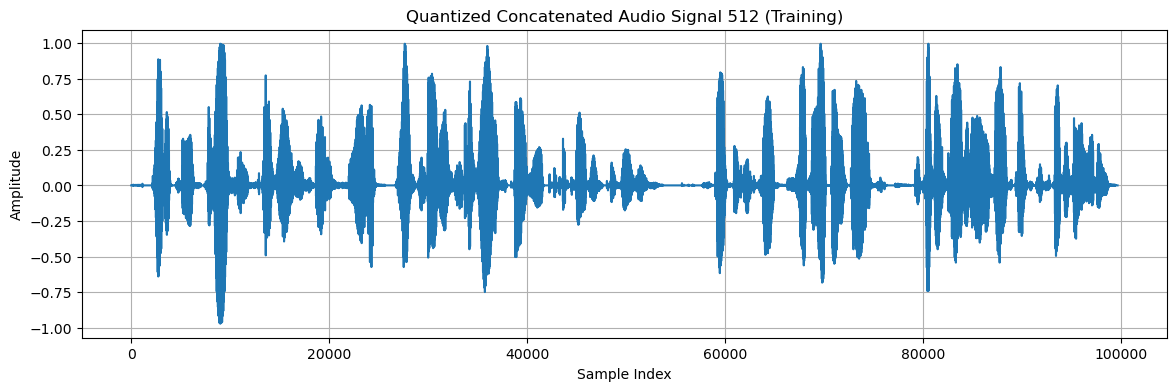

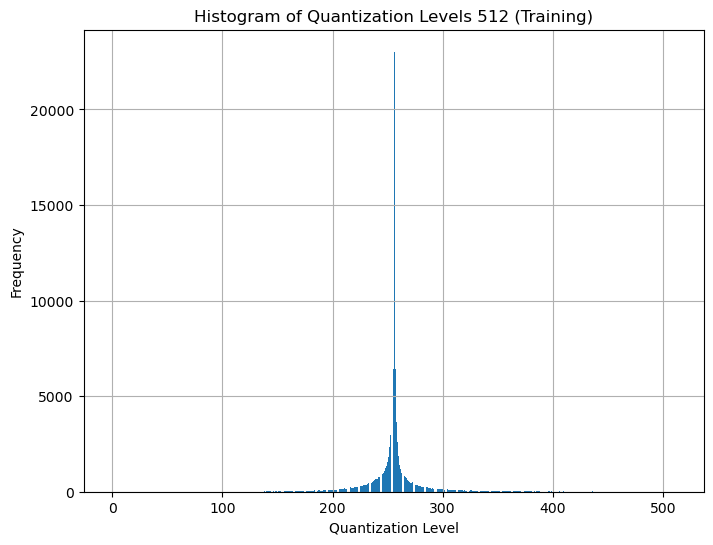

In [5]:
# 定义量化级别数量
num_levels = 512

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram_512 = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram_512[int((quantized_val + 1) / quantization_step)] += 1

# 绘制量化后的音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(q)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Quantized Concatenated Audio Signal 512 (Training)')
plt.grid(True)
plt.show()

# 绘制量化步长的频率直方图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(num_levels), quantization_histogram_512, width=0.8)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantization Levels 512 (Training)')
plt.grid(True)
plt.show()


# Huffman coding of training data (M3 + F3) Qualified 512

In [6]:
import heapq
from collections import defaultdict

# Function to build the Huffman tree
def build_huffman_tree(probabilities):
    heap = [[probability, [quantization_level, '']] for quantization_level, probability in enumerate(probabilities) if probability > 0]
    heapq.heapify(heap)
    
    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        
        for pair in left[1:]:
            pair[1] = '0' + pair[1]
        for pair in right[1:]:
            pair[1] = '1' + pair[1]
            
        heapq.heappush(heap, [left[0] + right[0]] + left[1:] + right[1:])
        
    return sorted(heapq.heappop(heap)[1:], key=lambda p: (len(p[-1]), p))

# Function to generate Huffman codes for each quantization level
def generate_huffman_codes(probabilities):
    huffman_tree = build_huffman_tree(probabilities)
    huffman_codes = {}
    
    for quantization_level, code in huffman_tree:
        huffman_codes[quantization_level] = code
        
    return huffman_codes

# Get the probabilities of quantization levels
quantization_probabilities_512 = quantization_histogram_512 / len(normalized_train_samples)

# Generate Huffman codes for each quantization level
huffman_codes_512 = generate_huffman_codes(quantization_probabilities_512)


# Create a dictionary to store the Huffman codes
huffman_code_dict_512 = {}

# Fill the dictionary with Huffman codes for each quantization level
for quantization_level, code in huffman_codes_512.items():
    huffman_code_dict_512[quantization_level] = code

# Print the Huffman code dictionary
print("Huffman Code Dictionary:")
print(huffman_code_dict_512)


Huffman Code Dictionary:
{256: '01', 255: '1010', 257: '1011', 252: '00000', 253: '10000', 254: '11101', 258: '11010', 259: '00100', 248: '000100', 249: '001011', 250: '100100', 251: '110010', 260: '110110', 261: '001110', 262: '000010', 238: '0000111', 239: '0001111', 240: '0010100', 241: '0011000', 242: '1001011', 243: '1000111', 244: '1100000', 245: '1100111', 246: '1110011', 247: '1111011', 263: '1110010', 264: '1101111', 265: '1001110', 266: '1000110', 267: '0011110', 268: '0001100', 224: '00001101', 225: '00010101', 226: '00010111', 227: '00011011', 228: '00111110', 229: '00110110', 230: '00111111', 231: '00110100', 232: '10011001', 233: '11000111', 234: '11011100', 235: '11000110', 236: '11100011', 237: '11111011', 269: '11111101', 270: '11110010', 271: '11100000', 272: '11000100', 273: '11110001', 274: '11000010', 275: '10001001', 276: '00101010', 277: '00110010', 210: '000011000', 211: '001101110', 212: '000101001', 213: '001010111', 214: '100110001', 215: '100111110', 216: '1

# 1024 quantization of training data (M3 + F3) Qualified

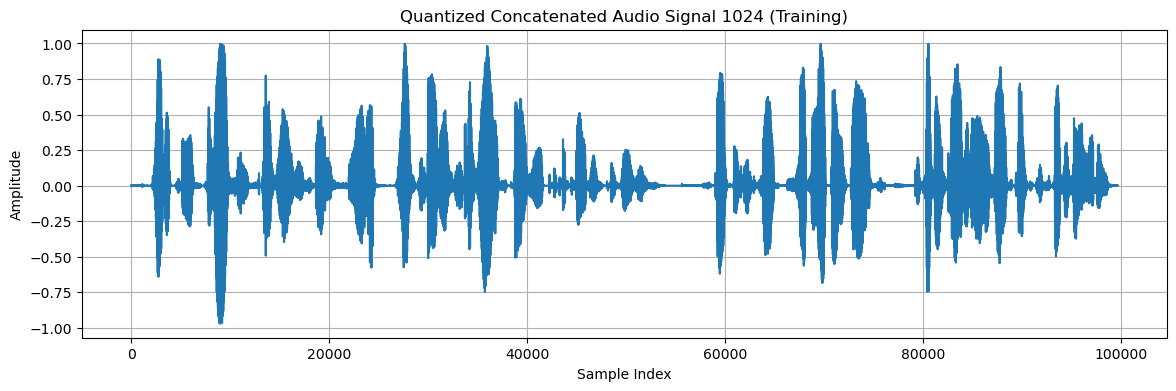

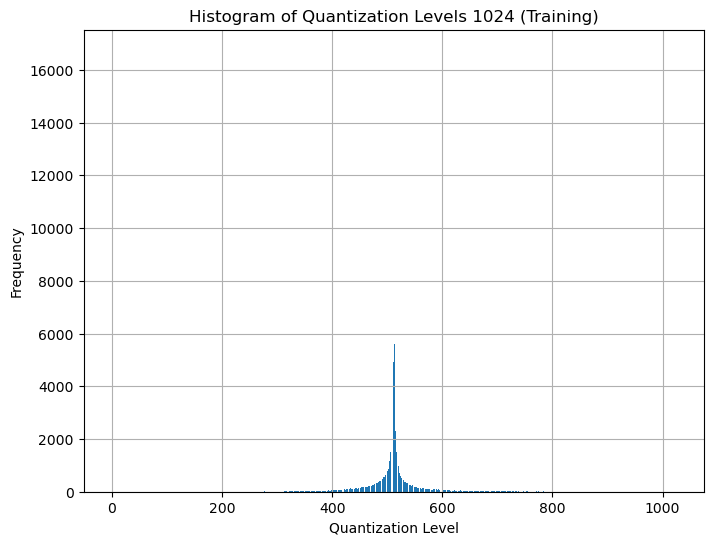

In [7]:
# 定义量化级别数量
num_levels = 1024

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram_1024 = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram_1024[int((quantized_val + 1) / quantization_step)] += 1

# 绘制量化后的音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(q)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Quantized Concatenated Audio Signal 1024 (Training)')
plt.grid(True)
plt.show()

# 绘制量化步长的频率直方图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(num_levels), quantization_histogram_1024, width=0.8)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantization Levels 1024 (Training)')
plt.grid(True)
plt.show()


# Huffman coding for 1024

In [8]:
# Get the probabilities of quantization levels
quantization_probabilities_1024 = quantization_histogram_1024 / len(normalized_train_samples)

# Generate Huffman codes for each quantization level
huffman_codes_1024 = generate_huffman_codes(quantization_probabilities_1024)


# Create a dictionary to store the Huffman codes
huffman_code_dict_1024 = {}

# Fill the dictionary with Huffman codes for each quantization level
for quantization_level, code in huffman_codes_1024.items():
    huffman_code_dict_1024[quantization_level] = code

# Print the Huffman code dictionary
print("Huffman Code Dictionary:")
print(huffman_code_dict_1024)


Huffman Code Dictionary:
{512: '111', 511: '0011', 513: '0110', 509: '00100', 510: '10010', 514: '10001', 515: '00001', 504: '000101', 505: '010010', 506: '011111', 507: '101010', 508: '110011', 516: '101101', 517: '100001', 518: '010100', 493: '0000010', 495: '0000011', 496: '0100000', 497: '0010110', 498: '0101100', 499: '0111000', 500: '1001110', 501: '1010010', 502: '1011000', 503: '1101110', 519: '1101011', 520: '1100101', 521: '1001101', 522: '0111011', 523: '0010111', 524: '0001100', 525: '0000001', 474: '00010010', 476: '01011110', 477: '00011100', 478: '01000110', 479: '00101001', 480: '01010100', 481: '01010110', 482: '01011010', 483: '01110101', 484: '10000000', 485: '10100010', 486: '10100001', 487: '10100000', 488: '10100111', 489: '10111101', 490: '10111011', 491: '11001000', 492: '11000001', 494: '11011001', 526: '11010010', 527: '11000110', 528: '10110010', 529: '10111001', 530: '10101101', 531: '10000001', 532: '10011000', 533: '01111010', 534: '01011100', 535: '010011

# 2048 quantization of training data (M3 + F3)

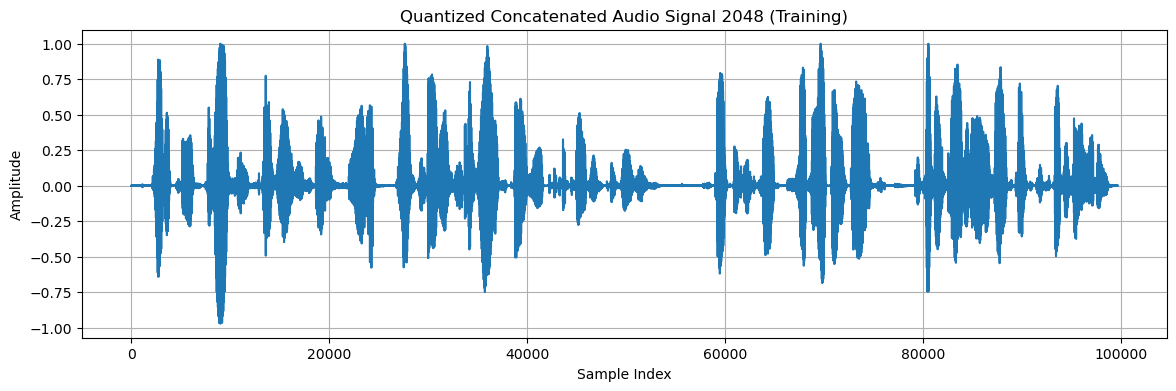

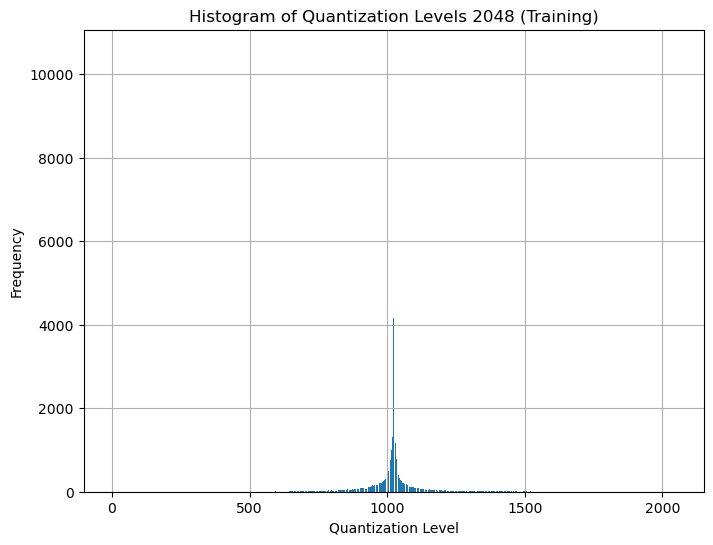

In [9]:

# 定义量化级别数量
num_levels = 2048

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram_2048 = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram_2048[int((quantized_val + 1) / quantization_step)] += 1

# 绘制量化后的音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(q)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Quantized Concatenated Audio Signal 2048 (Training)')
plt.grid(True)
plt.show()

# 绘制量化步长的频率直方图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(num_levels), quantization_histogram_2048, width=0.8)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantization Levels 2048 (Training)')
plt.grid(True)
plt.show()


# Huffman coding 2024

In [10]:
# Get the probabilities of quantization levels
quantization_probabilities_2048 = quantization_histogram_2048 / len(normalized_train_samples)

# Generate Huffman codes for each quantization level
huffman_codes_2048 = generate_huffman_codes(quantization_probabilities_2048)


# Create a dictionary to store the Huffman codes
huffman_code_dict_2048 = {}

# Fill the dictionary with Huffman codes for each quantization level
for quantization_level, code in huffman_codes_2048.items():
    huffman_code_dict_2048[quantization_level] = code

# Print the Huffman code dictionary
print("Huffman Code Dictionary:")
print(huffman_code_dict_2048)


Huffman Code Dictionary:
{1024: '010', 1025: '0111', 1022: '00001', 1023: '11101', 1026: '00110', 1018: '000110', 1019: '001010', 1020: '100110', 1021: '110000', 1027: '110001', 1028: '100011', 1029: '001110', 1008: '0000010', 1009: '0001001', 1010: '0010111', 1011: '0110101', 1012: '1000101', 1013: '1010110', 1014: '1001110', 1015: '1100100', 1016: '1101100', 1017: '1111000', 1030: '1111111', 1031: '1101110', 1032: '1011100', 1033: '1010011', 1034: '1001111', 1035: '0011111', 1036: '0110010', 991: '00101101', 992: '00010110', 993: '00000111', 994: '00010101', 995: '01100001', 996: '01100110', 997: '00100001', 998: '10001000', 999: '10000010', 1000: '10010111', 1001: '10100101', 1002: '10110000', 1003: '10101111', 1004: '10111010', 1005: '11010101', 1006: '11100101', 1007: '11110100', 1037: '11111101', 1038: '11100011', 1039: '11011011', 1040: '11010001', 1041: '10101011', 1042: '10101110', 1043: '10000110', 1044: '10000100', 1045: '00100111', 1046: '00011101', 1047: '00011111', 1051: 

# Calculate the Huffman code average length, total length, entropy

In [11]:
# 计算熵
def calculate_entropy(probabilities):
    # 将概率为0的值替换为一个很小的正数，避免log(0)的问题
    probabilities = np.where(probabilities == 0, 1e-12, probabilities)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# 计算平均编码长度
def calculate_average_code_length(probabilities, huffman_codes):
    average_code_length = 0
    for quantization_level, code in huffman_codes.items():
        average_code_length += len(code) * probabilities[quantization_level]
    return average_code_length

# 计算霍夫曼编码长度
def calculate_huffman_code_length(probabilities, huffman_codes):
    huffman_code_length = calculate_average_code_length(probabilities, huffman_codes) * len(probabilities)
    return huffman_code_length

# 获取平均编码长度
average_code_length_512 = calculate_average_code_length(quantization_probabilities_512, huffman_codes_512)

# 获取霍夫曼编码长度
huffman_code_length_512 = calculate_huffman_code_length(quantization_probabilities_512, huffman_codes_512)

# 获取熵
entropy_512 = calculate_entropy(quantization_probabilities_512)

# 输出结果
print("Entropy:", entropy_512)
print("Average Code Length:", average_code_length_512)
print("Huffman Code Length:", huffman_code_length_512)


# 获取平均编码长度
average_code_length_1024 = calculate_average_code_length(quantization_probabilities_1024, huffman_codes_1024)

# 获取霍夫曼编码长度
huffman_code_length_1024 = calculate_huffman_code_length(quantization_probabilities_1024, huffman_codes_1024)

# 获取熵
entropy_1024 = calculate_entropy(quantization_probabilities_1024)

# 输出结果
print("Entropy (1024):", entropy_1024)
print("Average Code Length (1024):", average_code_length_1024)
print("Huffman Code Length (1024):", huffman_code_length_1024)

# 获取平均编码长度
average_code_length_2048 = calculate_average_code_length(quantization_probabilities_2048, huffman_codes_2048)

# 获取霍夫曼编码长度
huffman_code_length_2048 = calculate_huffman_code_length(quantization_probabilities_2048, huffman_codes_2048)

# 获取熵
entropy_2048 = calculate_entropy(quantization_probabilities_2048)

# 输出结果
print("Entropy (2048):", entropy_2048)
print("Average Code Length (2048):", average_code_length_2048)
print("Huffman Code Length (2048):", huffman_code_length_2048)


Entropy: 5.623902451408624
Average Code Length: 5.64312454208775
Huffman Code Length: 2889.279765548928
Entropy (1024): 6.584799113689856
Average Code Length (1024): 6.616618324517936
Huffman Code Length (1024): 6775.417164306366
Entropy (2048): 7.56804556278238
Average Code Length (2048): 7.595772654736566
Huffman Code Length (2048): 15556.142396900486


# calculate the number of quantization levels

In [12]:
# 计算每个quantization level的symbol数量
def calculate_quantization_levels(probabilities):
    num_levels = len(probabilities)
    non_zero_levels = sum(1 for prob in probabilities if prob > 0)
    return non_zero_levels

# 获取每个quantization level的symbol数量
quantization_levels_512 = calculate_quantization_levels(quantization_probabilities_512)
quantization_levels_1024 = calculate_quantization_levels(quantization_probabilities_1024)
quantization_levels_2048 = calculate_quantization_levels(quantization_probabilities_2048)

# 输出结果
print("Quantization Levels (512):", quantization_levels_512)
print("Quantization Levels (1024):", quantization_levels_1024)
print("Quantization Levels (2048):", quantization_levels_2048)


Quantization Levels (512): 434
Quantization Levels (1024): 802
Quantization Levels (2048): 1432


# calculate the ground truth probabilities 16 signals

In [13]:
# Audio Data文件夹路径
folder_path = "/Users/kevingao/Desktop/Audio Data"

# 用于存储训练集的数组
train_samples = []

# 遍历每个文件夹
for folder_name in ["M1", "M2", "M3", "M4", "F1", "F2", "F3", "F4"]:
    folder_dir = os.path.join(folder_path, folder_name)
    
    # 确保文件夹是目标文件夹且存在
    if os.path.isdir(folder_dir):
        print("Processing folder:", folder_name)
        
        # 用于存储当前文件夹中的所有音频文件
        folder_samples = []
        
        # 遍历文件夹中的文件
        for file_name in os.listdir(folder_dir):
            if file_name.endswith(".wav"):
                wav_file_path = os.path.join(folder_dir, file_name)
                
                # 打开.wav文件
                wav_file = wave.open(wav_file_path, 'rb')
                
                # 读取.wav文件中的数据
                wav_data = wav_file.readframes(wav_file.getnframes())
                wav_file.close()
                
                # 将二进制数据转换为numpy数组
                wav_samples = np.frombuffer(wav_data, dtype=np.int16)
                
                # 将信号添加到当前文件夹的数组中
                folder_samples.append(wav_samples)
        
        # 如果当前文件夹中有两个.wav文件，则进行拼接并添加到训练集数组中
        if len(folder_samples) == 2:
            merged_samples = np.concatenate(folder_samples)
            train_samples.append(merged_samples)

# 将训练集信号转换为numpy数组
train_samples = np.concatenate(train_samples)

# 归一化训练集信号
max_val_train = np.max(np.abs(train_samples))
min_val_train = np.min(np.abs(train_samples))
normalized_train_samples = (train_samples - min_val_train) / (max_val_train - min_val_train)

# 定义量化级别数量
num_levels = 1024

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram[int((quantized_val + 1) / quantization_step)] += 1

# Normalize the quantization histogram to represent probabilities
quantization_histogram_prob_groundtruth = quantization_histogram / np.sum(quantization_histogram)



Processing folder: M1
Processing folder: M2
Processing folder: M3
Processing folder: M4
Processing folder: F1
Processing folder: F2
Processing folder: F3
Processing folder: F4


In [14]:
# Audio Data文件夹路径
folder_path = "/Users/kevingao/Desktop/Audio Data"

# 用于存储训练集的数组
train_samples = []

# 遍历每个文件夹
for folder_name in ["M1", "M2", "M3", "M4", "F1", "F2", "F3", "F4"]:
    folder_dir = os.path.join(folder_path, folder_name)
    
    # 确保文件夹是目标文件夹且存在
    if os.path.isdir(folder_dir):
        print("Processing folder:", folder_name)
        
        # 用于存储当前文件夹中的所有音频文件
        folder_samples = []
        
        # 遍历文件夹中的文件
        for file_name in os.listdir(folder_dir):
            if file_name.endswith(".wav"):
                wav_file_path = os.path.join(folder_dir, file_name)
                
                # 打开.wav文件
                wav_file = wave.open(wav_file_path, 'rb')
                
                # 读取.wav文件中的数据
                wav_data = wav_file.readframes(wav_file.getnframes())
                wav_file.close()
                
                # 将二进制数据转换为numpy数组
                wav_samples = np.frombuffer(wav_data, dtype=np.int16)
                
                # 将信号添加到当前文件夹的数组中
                folder_samples.append(wav_samples)
        
        # 如果当前文件夹中有两个.wav文件，则进行拼接并添加到训练集数组中
        if len(folder_samples) == 2:
            merged_samples = np.concatenate(folder_samples)
            train_samples.append(merged_samples)

# 将训练集信号转换为numpy数组
train_samples = np.concatenate(train_samples)

# 归一化训练集信号
max_val_train = np.max(np.abs(train_samples))
min_val_train = np.min(np.abs(train_samples))
normalized_train_samples = (train_samples - min_val_train) / (max_val_train - min_val_train)

# 定义量化级别数量
num_levels = 1024

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram[int((quantized_val + 1) / quantization_step)] += 1

# 定义函数以生成每个组合的 quantization_histogram_prob
def generate_quantization_histogram_prob(combination, num_levels, quantization_histograms):
    # 创建一个空的数组，用于存储量化步长的概率
    quantization_histogram_prob = np.zeros(num_levels)
    
    # 计算每个量化步长的概率
    for i in range(num_levels):
        prob = 1.0
        
        # 对于组合中的每个数字，将其对应的量化步长的频率转换为概率
        for j in range(len(combination)):
            prob *= quantization_histograms[combination[j] - 1][i]
        
        quantization_histogram_prob[i] = prob
    
    # 返回计算的量化步长概率
    return quantization_histogram_prob

# 定义组合列表
combinations = [
    [1], [2], [3], [4],
    [1, 2], [1, 3], [1, 4],
    [2, 3], [2, 4], [3, 4],
    [1, 2, 3], [1, 2, 4], [1, 3, 4],
    [2, 3, 4]
]

# 生成每个组合的 quantization_histogram_prob
quantization_histogram_probs = []
for combination in combinations:
    quantization_histogram_prob = generate_quantization_histogram_prob(combination, num_levels, [
        quantization_histogram_prob_1,
        quantization_histogram_prob_2,
        quantization_histogram_prob_3,
        quantization_histogram_prob_4,
    ])
    quantization_histogram_probs.append(quantization_histogram_prob)

# 生成 Ground Truth 的 quantization_histogram_prob
quantization_histogram_prob_groundtruth = quantization_histogram_prob_groundtruth

# 将 quantization_histogram_prob_groundtruth 添加到 quantization_histogram_probs 中
quantization_histogram_probs.append(quantization_histogram_prob_groundtruth)



Processing folder: M1
Processing folder: M2
Processing folder: M3
Processing folder: M4
Processing folder: F1
Processing folder: F2
Processing folder: F3
Processing folder: F4


NameError: name 'quantization_histogram_prob_1' is not defined

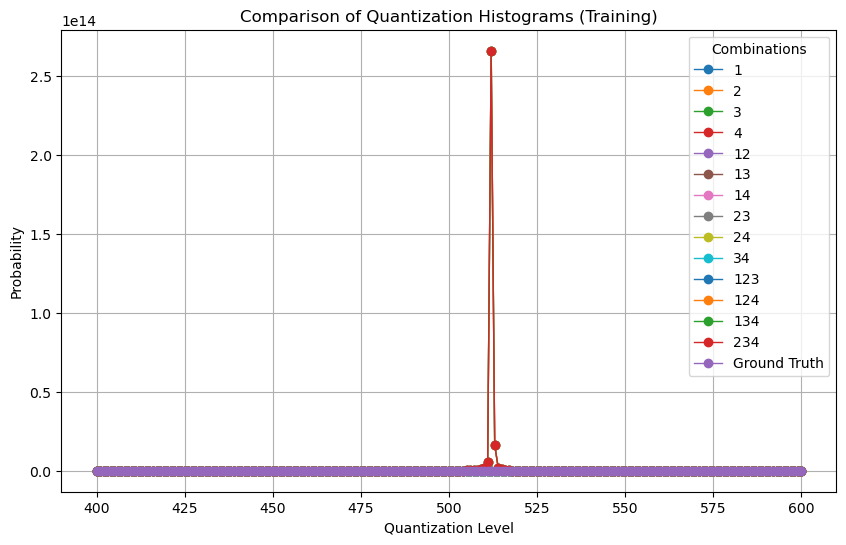

In [ ]:
# 设置 x 轴范围为 400 到 600
x_range = range(400, 601)

# 绘制所有组合的 quantization_histogram_prob 折线图
plt.figure(figsize=(10, 6))
for i, combination in enumerate(combinations):
    label = ''.join(map(str, combination))
    plt.plot(x_range, quantization_histogram_probs[i][400:601], label=label, marker='o', linestyle='-', linewidth=1)
plt.plot(x_range, quantization_histogram_prob_groundtruth[400:601], label='Ground Truth', marker='o', linestyle='-', linewidth=1)
plt.xlabel('Quantization Level')
plt.ylabel('Probability')
plt.title('Comparison of Quantization Histograms (Training)')
plt.grid(True)
plt.legend(title='Combinations', loc='upper right')
plt.show()


In [ ]:
def calculate_mse(hist1, hist2):
    return np.mean((hist1 - hist2) ** 2)

def calculate_prd(hist1, hist2):
    prd = np.sqrt(np.sum(((hist1 - hist2) ** 2) / (hist1 * hist2))) * 100
    if np.isinf(prd) or np.isnan(prd):
        return 0
    return prd

# 计算每种组合的 MSE 和 PRD
mse_scores = []
prd_scores = []

for prob in quantization_histogram_probs[:-1]:
    mse = calculate_mse(quantization_histogram_prob_groundtruth, prob)
    prd = calculate_prd(quantization_histogram_prob_groundtruth, prob)
    mse_scores.append(mse)
    prd_scores.append(prd)

# 添加 ground truth 的 MSE 和 PRD
mse_ground_truth = 0
prd_ground_truth = 0
mse_scores.append(mse_ground_truth)
prd_scores.append(prd_ground_truth)

# 输出 MSE 和 PRD
for i, combination in enumerate(combinations):
    label = ''.join(map(str, combination))
    print(f"Combination {label}:")
    print(f"MSE: {mse_scores[i]}")
    print(f"PRD: {prd_scores[i]}")
    print()

# 输出 Ground Truth 的 MSE 和 PRD
print("Ground Truth:")
print(f"MSE: {mse_scores[-1]}")
print(f"PRD: {prd_scores[-1]}")


Combination 1:
MSE: 6079701.224132864
PRD: 0

Combination 2:
MSE: 6079701.224132864
PRD: 0

Combination 3:
MSE: 6079701.224132864
PRD: 0

Combination 4:
MSE: 6079701.224132864
PRD: 0

Combination 12:
MSE: 1.7299545222549612e+16
PRD: 0

Combination 13:
MSE: 1.7299545222549612e+16
PRD: 0

Combination 14:
MSE: 1.7299545222549612e+16
PRD: 0

Combination 23:
MSE: 1.7299545222549612e+16
PRD: 0

Combination 24:
MSE: 1.7299545222549612e+16
PRD: 0

Combination 34:
MSE: 1.7299545222549612e+16
PRD: 0

Combination 123:
MSE: 6.949287305663729e+25
PRD: 0

Combination 124:
MSE: 6.949287305663729e+25
PRD: 0

Combination 134:
MSE: 6.949287305663729e+25
PRD: 0

Combination 234:
MSE: 6.949287305663729e+25
PRD: 0

Ground Truth:
MSE: 0
PRD: 0


/var/folders/77/2m8y7_gs1fd5t207n01qz35c0000gn/T/ipykernel_3077/1487701636.py:5: RuntimeWarning: invalid value encountered in divide
  prd = np.sqrt(np.sum(((hist1 - hist2) ** 2) / (hist1 * hist2))) * 100


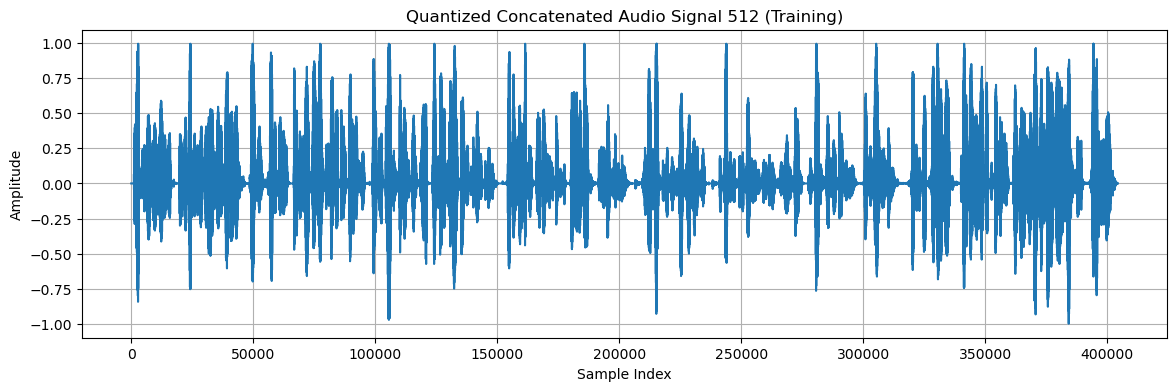

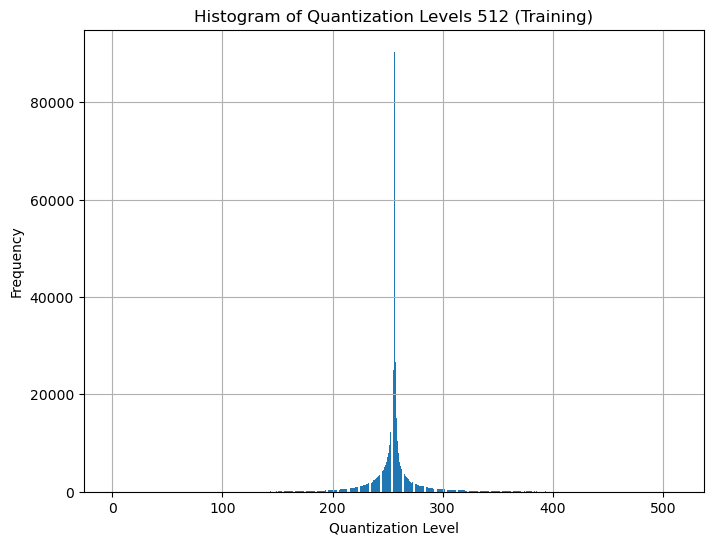

In [15]:
# 定义量化级别数量
num_levels = 512

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram_512 = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram_512[int((quantized_val + 1) / quantization_step)] += 1

# 绘制量化后的音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(q)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Quantized Concatenated Audio Signal 512 (Training)')
plt.grid(True)
plt.show()

# 绘制量化步长的频率直方图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(num_levels), quantization_histogram_512, width=0.8)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantization Levels 512 (Training)')
plt.grid(True)
plt.show()


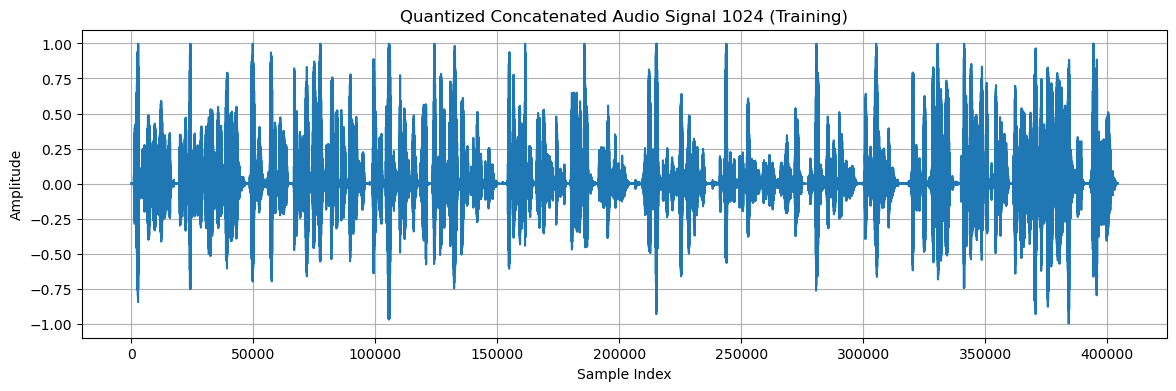

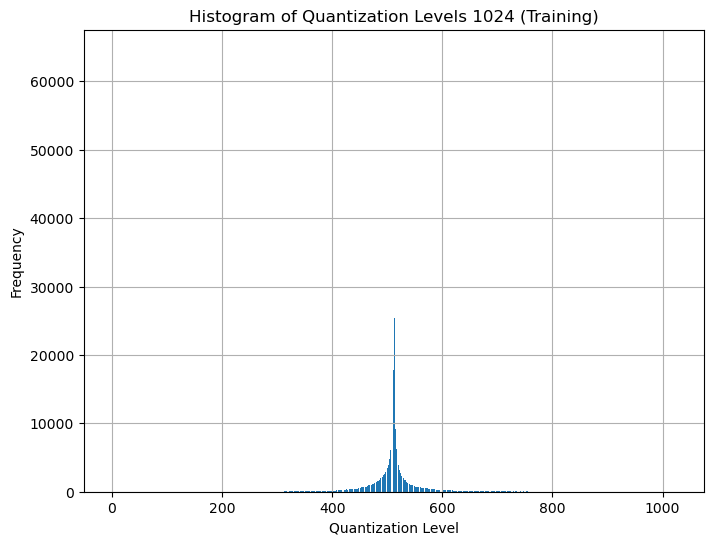

In [ ]:
# 定义量化级别数量
num_levels = 1024

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram_1024 = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram_1024[int((quantized_val + 1) / quantization_step)] += 1

# 绘制量化后的音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(q)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Quantized Concatenated Audio Signal 1024 (Training)')
plt.grid(True)
plt.show()

# 绘制量化步长的频率直方图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(num_levels), quantization_histogram_1024, width=0.8)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantization Levels 1024 (Training)')
plt.grid(True)
plt.show()


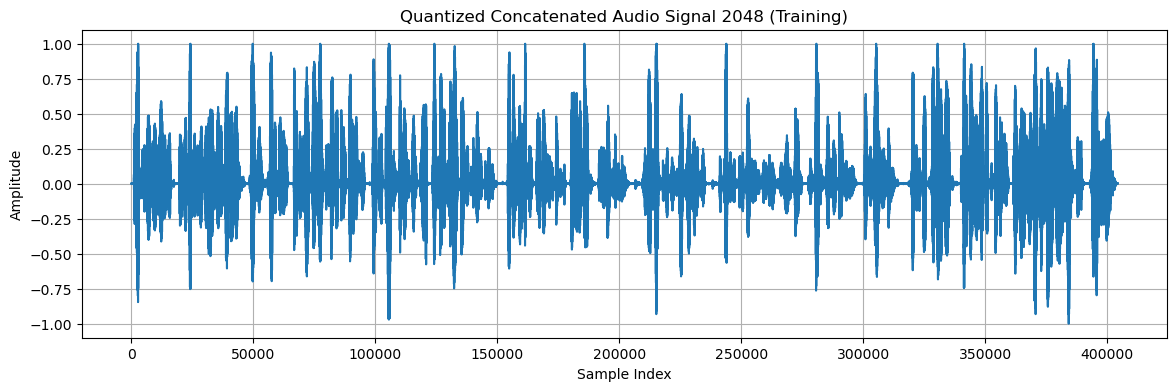

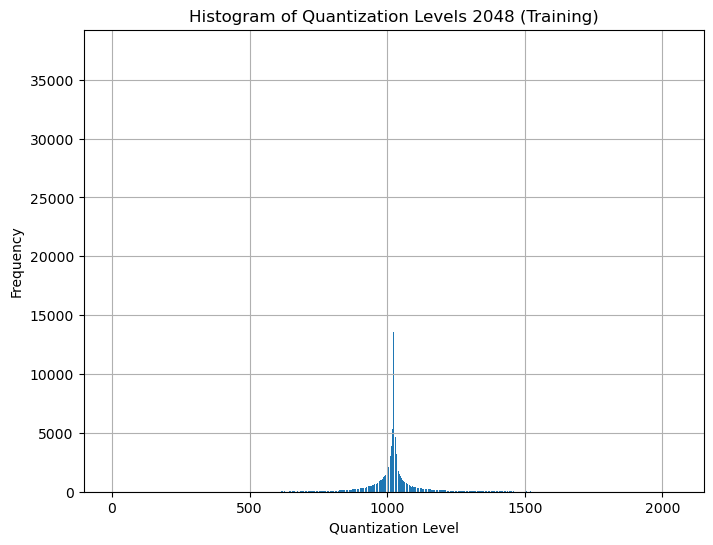

In [ ]:

# 定义量化级别数量
num_levels = 2048

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
q = np.zeros(len(normalized_train_samples))

# 用于存储每个量化步长的频率
quantization_histogram_2048 = np.zeros(num_levels)

# 循环遍历每个样本，进行量化
for i in range(len(normalized_train_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_train_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    q[i] = quantized_val
    
    # 更新当前量化步长的频率
    quantization_histogram_2048[int((quantized_val + 1) / quantization_step)] += 1

# 绘制量化后的音频信号波形图
plt.figure(figsize=(14, 4))
plt.plot(q)
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Quantized Concatenated Audio Signal 2048 (Training)')
plt.grid(True)
plt.show()

# 绘制量化步长的频率直方图
plt.figure(figsize=(8, 6))
plt.bar(np.arange(num_levels), quantization_histogram_2048, width=0.8)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantization Levels 2048 (Training)')
plt.grid(True)
plt.show()


Processing folder: F3
Processing folder: M3


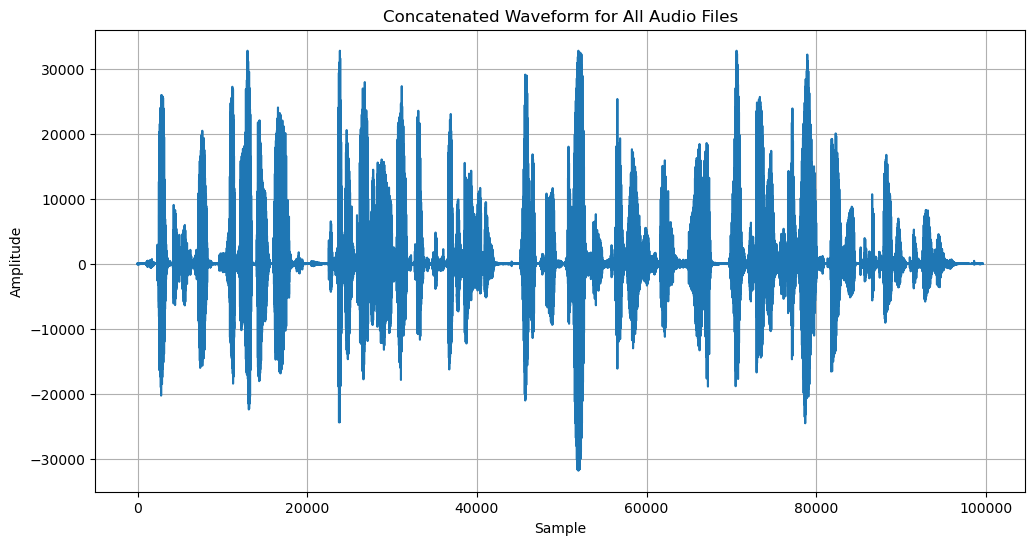

Concatenated Left Channel Samples:
[ 17 -29 -97 ...  29  35  12]
Shape of concatenated left channel samples array: (99637,)


In [52]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt

# Test Audio文件夹路径
folder_path = "/Users/kevingao/Desktop/Audio Data"

# F4 和 M4 文件夹名
folders = ["F3", "M3"]

# 存储所有声道数据的列表
all_channels = []

for folder_name in folders:
    folder_dir = os.path.join(folder_path, folder_name)
    
    # 确保文件夹存在
    if os.path.isdir(folder_dir):
        print("Processing folder:", folder_name)
        
        # 遍历文件夹中的文件
        for file_name in os.listdir(folder_dir):
            if file_name.endswith(".wav"):
                wav_file_path = os.path.join(folder_dir, file_name)
                
                # 打开.wav文件
                wav_file = wave.open(wav_file_path, 'rb')
                
                # 获取.wav文件的参数
                channels = wav_file.getnchannels()  # 声道数
                sample_width = wav_file.getsampwidth()  # 采样位宽（字节数）
                frame_rate = wav_file.getframerate()  # 采样率
                frames = wav_file.getnframes()  # 总帧数

                # 读取.wav文件中的数据
                wav_data = wav_file.readframes(frames)
                wav_file.close()

                # 将二进制数据转换为numpy数组
                if sample_width == 1:
                    dtype = np.uint8  # 8-bit unsigned integer
                elif sample_width == 2:
                    dtype = np.int16  # 16-bit signed integer
                else:
                    raise ValueError("Unsupported sample width")

                wav_samples = np.frombuffer(wav_data, dtype=dtype)

                # 每个声道的数据
                if channels == 2:
                    left_channel = wav_samples[::2]
                    right_channel = wav_samples[1::2]
                else:
                    left_channel = wav_samples
                
                # 存储左声道数据到列表中
                all_channels.append(left_channel)

# 将所有左声道数据拼接成一个大数组
concatenated_left_channel = np.concatenate(all_channels)

# 绘制拼接后的波形图
plt.figure(figsize=(12, 6))
plt.plot(concatenated_left_channel)
plt.title("Concatenated Waveform for All Audio Files")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# 打印拼接后的左声道样本数组
print("Concatenated Left Channel Samples:")
print(concatenated_left_channel)

# 打印拼接后的左声道样本数组的形状
print("Shape of concatenated left channel samples array:", concatenated_left_channel.shape)

save_folder = "/Users/kevingao/Desktop/Save"

# 保存拼接后的左声道样本数组到.npy文件
save_path = os.path.join(save_folder, "concatenated_left_channel_samples.npy")
np.save(save_path, concatenated_left_channel)

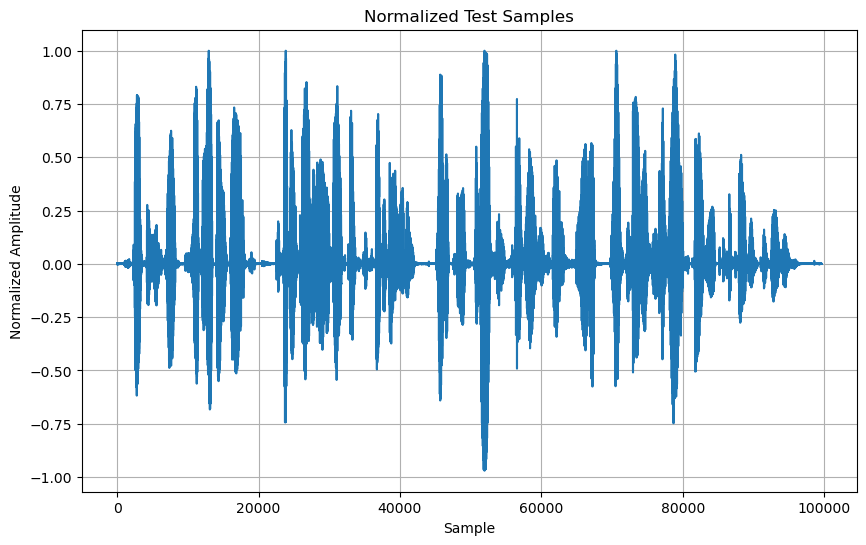

In [53]:
# 训练集归一化的最小值和最大值
min_val = -1
max_val = 1

# 计算测试集数据的最小值和最大值
test_min_val = min_val_train
test_max_val = max_val_train

# 归一化测试集数据
normalized_test_samples = ((concatenated_left_channel - test_min_val) / (test_max_val - test_min_val))


# 创建一个新的图形
plt.figure(figsize=(10, 6))

# 绘制归一化测试集数据的波形图
plt.plot(normalized_test_samples)
plt.xlabel("Sample")
plt.ylabel("Normalized Amplitude")
plt.title("Normalized Test Samples")
plt.grid(True)
plt.show()




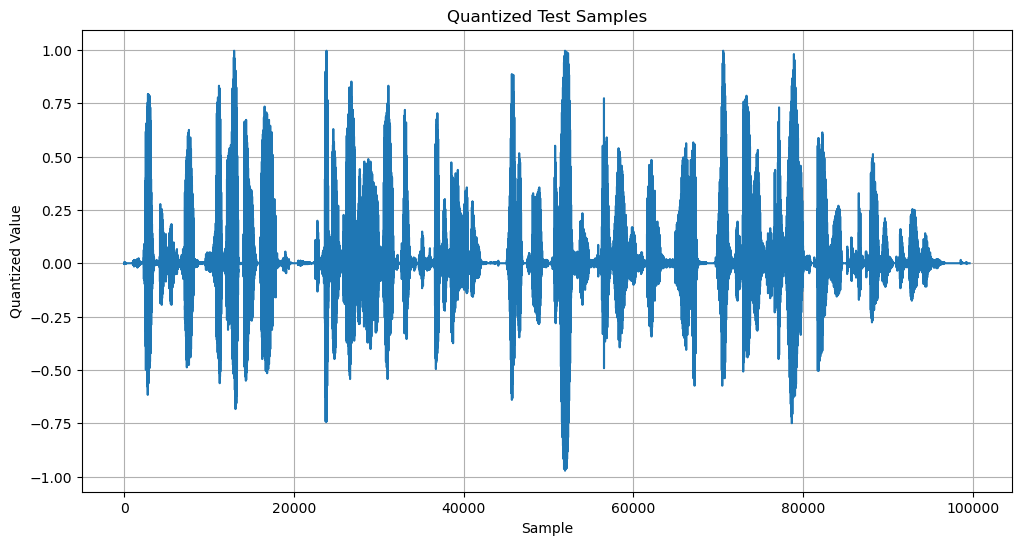

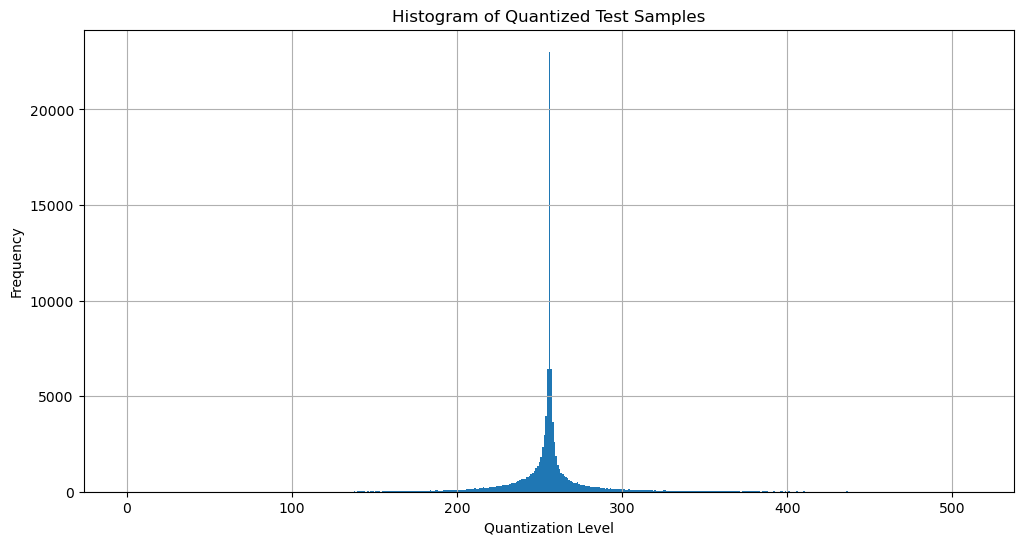

In [54]:
# 定义量化级别数量
num_levels = 512

# 计算量化步长
quantization_step = 2 / num_levels

# 创建一个空的数组，用于存储量化后的信号值
quantized_test_samples = np.zeros(len(normalized_test_samples))

# 循环遍历每个样本，进行量化
for i in range(len(normalized_test_samples)):
    min_diff = float('inf')
    quantized_val = 0
    
    # 计算当前样本与每个量化级别的差异
    for j in range(num_levels):
        level = -1 + j * quantization_step
        diff = abs(normalized_test_samples[i] - level)
        
        # 如果当前差异比之前的小，更新量化值和最小差异
        if diff < min_diff:
            min_diff = diff
            quantized_val = level
    
    # 将量化值存储在数组中
    quantized_test_samples[i] = quantized_val

# 绘制量化后的测试集数据的波形图
plt.figure(figsize=(12, 6))
plt.plot(quantized_test_samples)
plt.xlabel('Sample')
plt.ylabel('Quantized Value')
plt.title('Quantized Test Samples')
plt.grid(True)
plt.show()

# 统计每个量化级别的数量
quantization_histogram_test = np.zeros(num_levels)

# 统计每个量化值出现的次数
for sample in quantized_test_samples:
    index = int((sample + 1) / quantization_step)
    quantization_histogram_test[index] += 1

# 绘制量化级别的数量统计图
plt.figure(figsize=(12, 6))
plt.bar(range(num_levels), quantization_histogram_test, width=1)
plt.xlabel('Quantization Level')
plt.ylabel('Frequency')
plt.title('Histogram of Quantized Test Samples')
plt.grid(True)
plt.show()


In [57]:
import time

# Function to encode the quantized samples using Huffman coding
def huffman_encode(quantized_samples, huffman_codes, num_levels):
    encoded_bits = []
    
    # Mapping function to map sample values to quantization levels
    def map_to_quantization_level(sample):
        return int((sample + 1) / 2 * (num_levels))
    
    # Encode each quantized sample
    for sample in quantized_samples:
        # Map sample value to quantization level
        quantization_level = map_to_quantization_level(sample)
        
        # Check if the quantization level is in the Huffman codes dictionary
        if quantization_level in huffman_codes:
            encoded_bits.extend(huffman_codes[quantization_level])
    
    return encoded_bits

time_start = time.time()
# Encode the quantized test samples using the Huffman codes
encoded_bits = huffman_encode(quantized_test_samples, huffman_code_dict_512, num_levels)
time_end = time.time()
print("Time difference: ", time_end - time_start)

# Print the encoded bits length
print("Encoded Bits Length:", len(encoded_bits))


Time difference:  0.029468059539794922
Encoded Bits Length: 562264


Time Difference: 0.05548501014709473
sizes: (99637,)


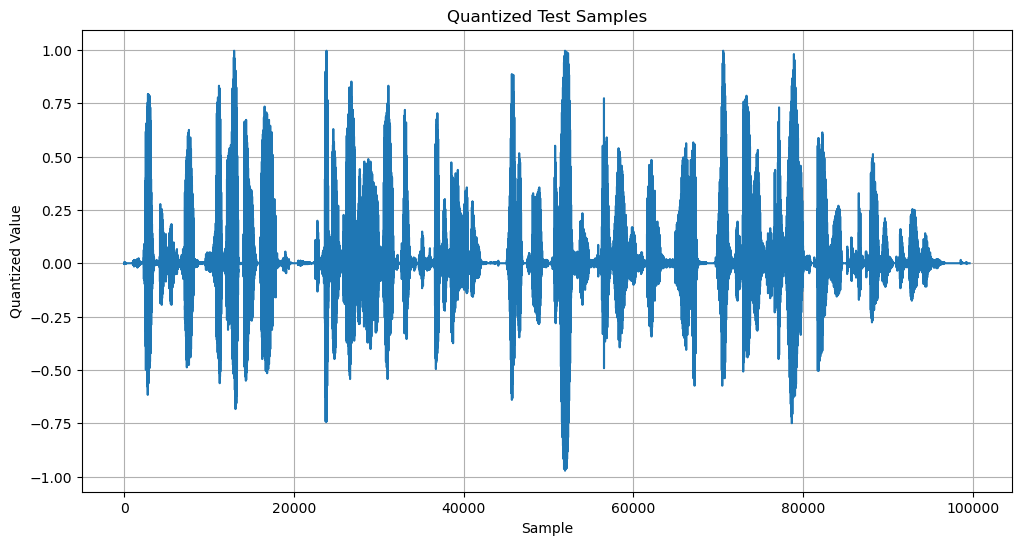

Denormalized Array:
[   0.            0.         -127.99609375 ...    0.            0.
    0.        ]


NameError: name 'wavfile' is not defined

In [58]:
# Function to decode the encoded bits using Huffman coding
def huffman_decode(encoded_bits, huffman_codes):
    decoded_samples = []
    current_code = ""
    
    # Invert the Huffman codes dictionary
    inverted_huffman_codes = {v: k for k, v in huffman_codes.items()}
    
    # Iterate through each bit in the encoded bits
    for bit in encoded_bits:
        current_code += bit
        
        # Check if the current code is in the inverted Huffman codes
        if current_code in inverted_huffman_codes:
            symbol = inverted_huffman_codes[current_code]
            # Normalize the symbol to [-1, 1] range
            decoded_value = ((symbol / num_levels) * 2) - 1
            decoded_samples.append(decoded_value)
            current_code = ""
    
    # Convert the decoded samples to a numpy array
    decoded_array = np.array(decoded_samples)
    
    return decoded_array
start_time = time.time()

# Decode the encoded bits using the Huffman codes and get the numpy array
decoded_array = huffman_decode(encoded_bits, huffman_code_dict_512)
end_time = time.time()

# print the time difference
print("Time Difference:", end_time - start_time)
print("sizes:", decoded_array.shape)
# 绘制量化后的测试集数据的波形图
plt.figure(figsize=(12, 6))
plt.plot(decoded_array)
plt.xlabel('Sample')
plt.ylabel('Quantized Value')
plt.title('Quantized Test Samples')
plt.grid(True)
plt.show()


# Denormalize the decoded array
denormalized_array = decoded_array * (max_val_train - min_val_train) + min_val_train

# Print the denormalized array
print("Denormalized Array:")
print(denormalized_array)

# Save the numpy array as a .wav file
output_file = "decoded_audio.wav"
wavfile.write(output_file, frame_rate, denormalized_array.astype(np.int16))


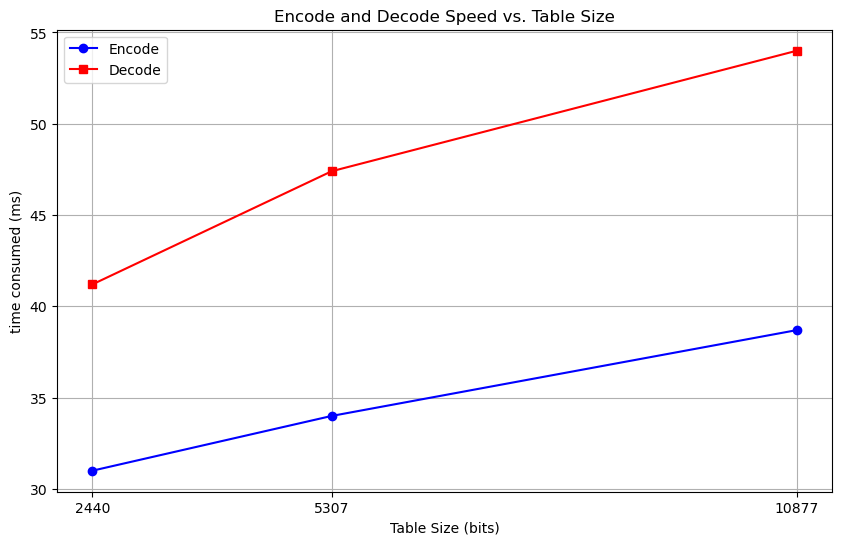

In [61]:
import matplotlib.pyplot as plt

# Table size 数据
table_size = [2440, 5307, 10877]

# Encode speed 数据
encode_speed = [31.0, 34.0, 38.7]

# Decode speed 数据
decode_speed = [41.2, 47.4, 54.0]

# 画图
plt.figure(figsize=(10, 6))
plt.plot(table_size, encode_speed, marker='o', label='Encode', color='b')
plt.plot(table_size, decode_speed, marker='s', label='Decode', color='r')

# 添加标题和标签
plt.title('Encode and Decode Speed vs. Table Size')
plt.xlabel('Table Size (bits)')
plt.ylabel('time consumed (ms)')
plt.xticks(table_size)
plt.grid(True)
plt.legend()

# 显示图例
plt.legend()

# 显示图表
plt.show()
